In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/Colab Notebooks/Sangam'

/content/drive/My Drive/Colab Notebooks/Sangam


In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#importing data
train_ori = pd.read_csv("Train.csv")    #load data
test_ori = pd.read_csv("Test.csv")

In [0]:
#checking the columns of training data
train_ori.head()

,index,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,hour,minute,second
0,0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0
1,1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0
2,2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0
3,3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0
4,4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0


In [0]:
#checking the columns of test data
test_ori.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,year,month,day,hour,minute,second
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain,2017,5,18,0,0,0
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist,2017,5,18,0,0,0
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle,2017,5,18,0,0,0
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain,2017,5,18,1,0,0
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist,2017,5,18,1,0,0


In [0]:
#checking presence of null values
#train.isnull().sum()

In [0]:
#test.isnull().sum()

In [0]:
val= []
for i in range(len(train_ori)):
  val.append(train_ori.weather_type[i].lower() in train_ori.weather_description[i].lower())

In [0]:
ind = (i for i, e in enumerate(val) if e == False)

In [0]:
next(ind)

StopIteration: ignored

In [0]:
train_ori =train_ori.drop(29468, axis=0)

In [0]:
train_ori =train_ori.drop(33265, axis=0)

In [0]:
train_ori = train_ori[train_ori['temperature']!=0]

In [0]:
train_ori = train_ori[train_ori['rain_p_h']<=56]

In [0]:
train_ori = train_ori.reset_index()

In [0]:
import datetime

In [0]:
train_ori['year'] = pd.DatetimeIndex(train_ori['date_time']).year
train_ori['month'] = pd.DatetimeIndex(train_ori['date_time']).month
train_ori['day'] = pd.DatetimeIndex(train_ori['date_time']).day
train_ori['hour'] = pd.DatetimeIndex(train_ori['date_time']).hour
train_ori['minute'] = pd.DatetimeIndex(train_ori['date_time']).minute
train_ori['second'] = pd.DatetimeIndex(train_ori['date_time']).second

In [0]:
test_ori['year'] = pd.DatetimeIndex(test_ori['date_time']).year
test_ori['month'] = pd.DatetimeIndex(test_ori['date_time']).month
test_ori['day'] = pd.DatetimeIndex(test_ori['date_time']).day
test_ori['hour'] = pd.DatetimeIndex(test_ori['date_time']).hour
test_ori['minute'] = pd.DatetimeIndex(test_ori['date_time']).minute
test_ori['second'] = pd.DatetimeIndex(test_ori['date_time']).second

In [0]:
train_ori.head()

,level_0,index,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,hour,minute,second
0,0,0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9,0,0
1,1,1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10,0,0
2,2,2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11,0,0
3,3,3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12,0,0
4,4,4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13,0,0


In [0]:
#dropping date_time column from data
train = train_ori.drop(['index','date_time'], axis=1 )
test = test_ori.drop(['date_time'], axis=1 )

In [0]:
#converting string values to categorical numbers
# train.is_holiday = pd.factorize(train.is_holiday)[0]
# test.is_holiday = pd.factorize(test.is_holiday)[0]


train.loc[train["is_holiday"] != 'None', "is_holiday"] = 1
train.loc[train["is_holiday"] == 'None', "is_holiday"] = 0


test.loc[test["is_holiday"] != 'None', "is_holiday"] = 1
test.loc[test["is_holiday"] == 'None', "is_holiday"] = 0

In [0]:
train.weather_type = pd.factorize(train.weather_type)[0]
test.weather_type = pd.factorize(test.weather_type)[0]

In [0]:
train.weather_description = pd.factorize(train.weather_description)[0]
test.weather_description = pd.factorize(test.weather_description)[0]

In [0]:
from sklearn.preprocessing import OneHotEncoder
myEncoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

columnsToEncode = ['is_holiday', 'air_pollution_index', 'wind_direction', 'weather_type', 'weather_description']

myEncoder.fit(train[columnsToEncode])

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='ignore',
              n_values=None, sparse=False)

In [0]:
train_new= pd.concat([train.drop(columnsToEncode, 1),
          pd.DataFrame(myEncoder.transform(train[columnsToEncode]))], axis=1).reindex()

In [0]:
train_new = train

In [0]:
X = train_new.drop(['traffic_volume'], axis=1)
y = train_new['traffic_volume']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
clf1 = RandomForestRegressor(random_state=0, n_estimators=100)
clf1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
clf1.score(X_train, y_train)

0.9758114479231167

In [0]:
clf1.score(X_val, y_val)

0.8234353415835038

In [0]:
# from sklearn.model_selection import GridSearchCV

In [0]:
# param_grid = {
#     #'bootstrap': [True],
#     'max_depth': [ 100, 300, 1000],
#     #'max_features': [2, 3],
#    # 'min_samples_leaf': [3, 5],
#     #'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200,  300, 1000]
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [0]:
#grid_search.fit(X_train, y_train)

In [0]:
#grid_search.best_params_


In [0]:
# from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [0]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train, y_train)

In [0]:
#rf_random.best_params_

In [0]:
#pred = pd.DataFrame(clf1.predict(test))

In [0]:
#data_exp = pd.concat([test_ori['date_time'], pred] , axis=1)

In [0]:
#data_exp.columns = ['date_time', 'traffic_volume']

In [0]:
#data_exp.to_csv("data_exp3.csv", index=False)

In [0]:
# from sklearn.ensemble import AdaBoostRegressor
# clf2 =  AdaBoostRegressor(random_state=0, n_estimators=300, learning_rate= 1)
# clf2.fit(X_train, y_train)

In [0]:
#clf2.score(X_train, y_train)

In [0]:
#clf2.score(X_val, y_val)

In [0]:
from xgboost import XGBRegressor

In [0]:
clf3 =  XGBRegressor(random_state=0, n_estimators=300, learning_rate= 0.01)
clf3.fit(X_train, y_train)

[15:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
clf3.score(X_train, y_train)

0.7635412185126335

In [0]:
clf3.score(X_val, y_val)

0.7627888872098839

In [0]:
from sklearn.linear_model import LinearRegression
clf4 = LinearRegression()
clf4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
clf4.score(X_train, y_train)

0.17017080345422522

In [0]:
clf4.score(X_val, y_val)

0.1395695147226088

In [0]:
"""
Train the NN model.
"""
import sys
import warnings
import argparse
import numpy as np
import pandas as pd
#from model import model
from keras.models import Model
from keras.callbacks import EarlyStopping
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:
"""
Defination of NN model
"""
from keras.layers import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import Sequential


def get_lstm(units):
    """LSTM(Long Short-Term Memory)
    Build LSTM Model.
    # Arguments
        units: List(int), number of input, output and hidden units.
    # Returns
        model: Model, nn model.
    """

    model = Sequential()
    model.add(LSTM(units[1], input_shape=(units[0], 1), return_sequences=True))
    model.add(LSTM(units[2]))
  #  model.add(Dropout(0.2))
    model.add(LSTM(units[3]))
  #  model.add(LSTM(units[4]))
    model.add(Dropout(0.2))
    model.add(Dense(units[4], activation='linear'))

    return model


In [0]:
def train_model(model, X_train, y_train, name, config):
    """train
    train a single model.
    # Arguments
        model: Model, NN model to train.
        X_train: ndarray(number, lags), Input data for train.
        y_train: ndarray(number, ), result data for train.
        name: String, name of model.
        config: Dict, parameter for train.
    """

    model.compile(loss="mse", optimizer="rmsprop", metrics=['mape'])
    # early = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
    hist = model.fit(
        X_train, y_train,
        batch_size=config["batch"],
        epochs=config["epochs"],
        validation_split=0.05)

    model.save('model/' + name + '.h5')
    df = pd.DataFrame.from_dict(hist.history)
    df.to_csv('model/' + name + ' loss.csv', encoding='utf-8', index=False)


In [0]:
def main(X, y):
#     parser = argparse.ArgumentParser()
#     parser.add_argument(
#         "--model",
#         default="lstm",
#         help="Model to train.")
#     args = parser.parse_args()


    model = 'lstm'
    lag = 12
    config = {"batch": 256, "epochs": 10}
#     file1 = 'data/train.csv'
#     file2 = 'data/test.csv'
    
  
    X = np.array(X)
    y = np.array(y)
   # y = np.newaxis(y)
   # y= y [np.newaxis, :] 
    
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)
    
   # X_train, y_train, _, _, _ = process_data(file1, file2, lag)

    if model == 'lstm':
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        m = get_lstm([20, 512, 512 ,512, 1])
        train_model(m, X_train, y_train, model, config)
        
#     if args.model == 'gru':
#         X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#         m = model.get_gru([12, 64, 64, 1])
#         train_model(m, X_train, y_train, args.model, config)
#     if args.model == 'saes':
#         X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
#         m = model.get_saes([12, 400, 400, 400, 1])
#         train_seas(m, X_train, y_train, args.model, config)


In [0]:
# X = train_new.drop(['traffic_volume'], axis=1)
# y = train_new['traffic_volume']

# main(X, y )

In [0]:
train_new = train

In [0]:
cols = list(train_new)

In [0]:
cols

['level_0',
 'is_holiday',
 'air_pollution_index',
 'humidity',
 'wind_speed',
 'wind_direction',
 'visibility_in_miles',
 'dew_point',
 'temperature',
 'rain_p_h',
 'snow_p_h',
 'clouds_all',
 'weather_type',
 'weather_description',
 'traffic_volume',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second']

In [0]:
cols[-7], cols[-1] = cols[-1], cols[-7]

In [0]:
train_new = train_new.ix[:,cols]

In [0]:
train_new

,level_0,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,second,year,month,day,hour,minute,traffic_volume
0,0,0,121,89,2,329,1,1,288.28,0.0,0.0,40,0,0,0,2012,10,2,9,0,5545
1,1,0,178,67,3,330,1,1,289.36,0.0,0.0,75,0,1,0,2012,10,2,10,0,4516
2,2,0,113,66,3,329,2,2,289.58,0.0,0.0,90,0,2,0,2012,10,2,11,0,4767
3,3,0,20,66,3,329,5,5,290.13,0.0,0.0,90,0,2,0,2012,10,2,12,0,5026
4,4,0,281,65,3,329,7,7,291.14,0.0,0.0,75,0,1,0,2012,10,2,13,0,4918
5,5,0,23,65,3,328,6,6,291.72,0.0,0.0,1,1,3,0,2012,10,2,14,0,5181
6,6,0,184,64,3,328,7,7,293.17,0.0,0.0,1,1,3,0,2012,10,2,15,0,5584
7,7,0,167,64,3,327,7,7,293.86,0.0,0.0,1,1,3,0,2012,10,2,16,0,6015
8,8,0,119,63,3,327,6,6,294.14,0.0,0.0,20,0,4,0,2012,10,2,17,0,5791
9,9,0,161,63,3,326,3,3,293.10,0.0,0.0,20,0,4,0,2012,10,2,18,0,4770


In [0]:
X = train_new.drop(['level_0','traffic_volume'], axis=1)
y = train_new['traffic_volume']

In [0]:
X = np.array(X)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = False)

In [0]:
#reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(26989, 1, 725) (26989,) (6748, 1, 725) (6748,)


In [0]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train,  x_test, y_train, y_test]

In [0]:
train_X, test_X, train_y, test_y = load_data(train_new, 10)


In [0]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30352, 10, 21) (30352,) (3373, 10, 21) (3373,)


In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras import initializers
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from keras import losses

#model.compile(, optimizer='sgd')



model = Sequential()

model.add(LSTM(512, return_sequences=True,
               input_shape=(train_X.shape[1],train_X.shape[2]), activation = 'relu'))  
#model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True, activation = 'relu', ))  
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False, activation = 'relu',  )) 

model.add(Dropout(0.2))
model.add(Dense(32,activation='relu', ))  

model.add(Dense(1, activation='linear'))


# model.add(Dense(512, activation = 'relu'))  
# # model.add(Dropout(0.5))
# # model.add(Dense(256, activation = 'relu', ))  
# # model.add(Dropout(0.5))
# # model.add(Dense(128,  activation = 'relu',  )) 
# # model.add(Dropout(0.5))
# model.add(Dense(32,activation='relu', ))  
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='linear'))

# model = Sequential()
# #model.add(LSTM(50, activation = 'relu', input_shape=(train_X.shape[1],train_X.shape[2]), return_sequences= False))
# model.add(Embedding(train_X.shape[1], output_dim=256))

# model.add(LSTM(50, activation = 'relu', return_sequences= True))

# model.add(LSTM(50, activation = 'relu', return_sequences= False))

# model.add(Dense(1, activation='linear' ))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
rms = RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

model.compile(loss=losses.mean_squared_error, optimizer=rms,  metrics = ['accuracy'])
# fit network

history = model.fit(train_X, train_y, epochs=2000, batch_size=128, validation_data=(test_X, test_y))

Train on 30352 samples, validate on 3373 samples
Epoch 1/2000
18816/30352 [=================>............] - ETA: 12s - loss: 6407851.3129 - acc: 1.0629e-04

In [0]:
model.predict(train_X)

(26989, 1)

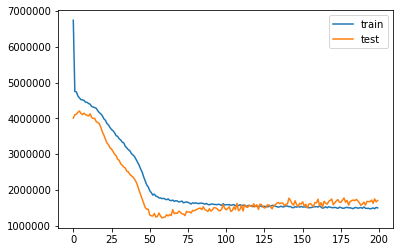

In [0]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()


In [0]:
 # make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)